In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from google.cloud import bigquery
pd.set_option('display.max_rows', 100)    # Show all rows



load_dotenv()
query_path = os.environ.get('BASE_QUERY_PATH')
client = bigquery.Client(os.environ.get('BIGQUERY_PROJECT_NAME'))



In [2]:
print(os.environ.get('BIGQUERY_PROJECT_NAME'))


phys-439706


In [18]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/fnhrt_symtoms.sql", 'r') as file:
    FNHRT_read = file.read()

FNHRT_result = client.query(FNHRT_read).to_dataframe()
FNHRT_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,hadm_id,icustay_id,transfusion_starttime,transfusion_endtime,chartdate,charttime,text,symptom_mentioned
0,975,175734,286445,2142-05-15 17:38:00,2142-05-15 19:14:00,2142-05-15,2142-05-15 21:51:00,"TITLE:\n Chief Complaint: back pain, decrea...",Chills
1,975,175734,286445,2142-05-15 20:07:00,2142-05-15 21:07:00,2142-05-15,2142-05-15 21:51:00,"TITLE:\n Chief Complaint: back pain, decrea...",Chills
2,975,175734,286445,2142-05-15 20:14:00,2142-05-15 21:14:00,2142-05-15,2142-05-15 21:51:00,"TITLE:\n Chief Complaint: back pain, decrea...",Chills
3,1709,127294,207018,2118-01-02 23:30:00,2118-01-03 03:15:00,2118-01-03,2118-01-03 00:00:00,Chief Complaint: exertional dyspnea\n HPI:\...,Chills
4,1709,127294,207018,2118-01-02 23:30:00,2118-01-03 03:15:00,2118-01-03,2118-01-03 00:00:00,Chief Complaint: exertional dyspnea\n HPI:\...,Chills
...,...,...,...,...,...,...,...,...,...
1873,99054,121277,203553,2119-01-09 22:15:00,2119-01-10 00:00:00,2119-01-10,2119-01-10 00:17:00,Chief Complaint: Melena\n HPI:\n Ms. [**K...,Chills
1874,99054,121277,203553,2119-01-09 22:15:00,2119-01-10 00:00:00,2119-01-10,2119-01-10 00:17:00,Chief Complaint: Melena\n HPI:\n Ms. [**K...,Chills
1875,99256,128919,205621,2161-02-02 14:41:00,2161-02-02 15:41:00,2161-02-02,2161-02-02 17:56:00,49 year old female who developed acute RUQ pai...,Chills
1876,99256,128919,205621,2161-02-02 15:56:00,2161-02-02 16:38:00,2161-02-02,2161-02-02 17:56:00,49 year old female who developed acute RUQ pai...,Chills


In [19]:
#Check unique patients
unique_patients = FNHRT_result.drop_duplicates(subset=['subject_id']).reset_index(drop=True)
unique_patients

,subject_id,hadm_id,icustay_id,transfusion_starttime,transfusion_endtime,chartdate,charttime,text,symptom_mentioned
0,975,175734,286445,2142-05-15 17:38:00,2142-05-15 19:14:00,2142-05-15,2142-05-15 21:51:00,"TITLE:\n Chief Complaint: back pain, decrea...",Chills
1,1709,127294,207018,2118-01-02 23:30:00,2118-01-03 03:15:00,2118-01-03,2118-01-03 00:00:00,Chief Complaint: exertional dyspnea\n HPI:\...,Chills
2,2387,177843,284295,2105-01-15 01:45:00,2105-01-15 04:45:00,2105-01-15,2105-01-15 06:48:00,Chief Complaint: GIB\n 24 Hour Events:\n EKG...,Chills
3,3742,158507,284853,2189-04-18 00:11:00,2189-04-18 03:09:00,2189-04-18,2189-04-18 01:33:00,Chief Complaint: GI Bleed\n I saw and exami...,Chills
4,3969,147237,211792,2152-06-04 12:00:00,2152-06-04 15:59:00,2152-06-04,2152-06-04 17:12:00,"65 yo F with h/o CAD s/p CABG, diastolic CHF, ...",Chills
...,...,...,...,...,...,...,...,...,...
352,98814,185436,270462,2141-02-09 05:04:00,2141-02-09 07:52:00,2141-02-09,2141-02-09 09:47:00,TITLE:\n Chief Complaint:\n 24 Hour Events...,Chills
353,98969,134756,209121,2185-08-04 06:30:00,2185-08-04 10:31:00,2185-08-04,2185-08-04 14:00:00,"37 y/o m c medical hx significant for HIV, hod...",Rigors
354,99054,121277,203553,2119-01-09 21:17:00,2119-01-09 22:15:00,2119-01-10,2119-01-10 00:17:00,Chief Complaint: Melena\n HPI:\n Ms. [**K...,Chills
355,99256,128919,205621,2161-02-02 14:41:00,2161-02-02 15:41:00,2161-02-02,2161-02-02 17:56:00,49 year old female who developed acute RUQ pai...,Chills


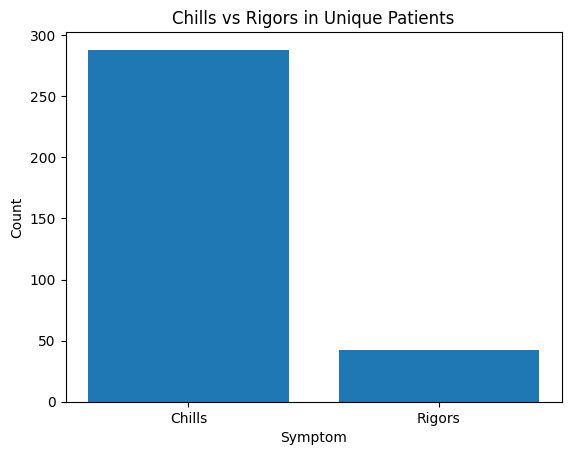

In [20]:
# Calculate counts of 'Chills' vs 'Rigors' for unique patients
unique_patients = FNHRT_result.drop_duplicates(subset=['subject_id']).reset_index(drop=True)

# Initialize counters
chills_count = 0
rigors_count = 0

# Count occurrences of each symptom
for index, patient in unique_patients.iterrows():
    symptom = patient['symptom_mentioned']
    if symptom == 'Chills':
        chills_count += 1
    elif symptom == 'Rigors':
        rigors_count += 1

# Prepare data for histogram
symptom_counts = {'Chills': chills_count, 'Rigors': rigors_count}

# Plot histogram
import matplotlib.pyplot as plt

plt.bar(symptom_counts.keys(), symptom_counts.values())
plt.title('Chills vs Rigors in Unique Patients')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.show()
